In [1]:
import seml
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from lataq.metrics.metrics import metrics
from lataq_reproduce.exp_dict import EXPERIMENT_INFO

/home/icb/carlo.dedonno/anaconda3/envs/lataq_cuda/lib/python3.8/site-packages/seml/database.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [10]:
scvi_results = seml.get_results('scvi', to_data_frame=True)
for score in list(scvi_results['result.integration_scores'].loc[0].columns):
    scvi_results[f'result.{score}'] = scvi_results['result.integration_scores'].apply(
        lambda x: x[score]
    )
scvi_results = scvi_results[[
    'config.data',
    'result.reference_time',
    'result.query_time',
    'result.PCR_batch',
    'result.graph_conn',
    'result.ebm',
    'result.knn'
]]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

/home/icb/carlo.dedonno/anaconda3/envs/lataq_cuda/lib/python3.8/site-packages/seml/evaluation.py:80: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  parsed = pd.io.json.json_normalize(parsed, sep='.')


In [24]:
scvi_results = scvi_results.assign(method='scvi')

In [15]:
scanvi_results = seml.get_results('scanvi', to_data_frame=True)
for score in list(scanvi_results['result.integration_scores'].loc[0].columns):
    scanvi_results[f'result.{score}'] = scanvi_results['result.integration_scores'].apply(
        lambda x: x[score]
    )
scanvi_results['result.f1-score-macro'] = scanvi_results['result.classification_report'].apply(
    lambda x: x.loc['macro avg']['f1-score']
)
scanvi_results['result.f1-score-weighted'] = scanvi_results['result.classification_report'].apply(
    lambda x: x.loc['weighted avg']['f1-score']
)
scanvi_results = scanvi_results[[
    'config.data',
    'result.reference_time',
    'result.query_time',
    'result.PCR_batch',
    'result.graph_conn',
    'result.ebm',
    'result.knn',
    'result.f1-score-macro',
    'result.f1-score-weighted'
]]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

/home/icb/carlo.dedonno/anaconda3/envs/lataq_cuda/lib/python3.8/site-packages/seml/evaluation.py:80: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  parsed = pd.io.json.json_normalize(parsed, sep='.')


In [23]:
scanvi_results = scanvi_results.assign(method='scanvi')

In [27]:
results = pd.concat([scanvi_results, scvi_results])

In [28]:
results

,config.data,result.reference_time,result.query_time,result.PCR_batch,result.graph_conn,result.ebm,result.knn,result.f1-score-macro,result.f1-score-weighted,method
0,pancreas,309.760305,33.549032,0.708918,0.844052,0.485389,0.873173,0.645804,0.960659,scanvi
1,pbmc,486.441077,35.019325,0.809077,0.937590,0.531115,0.890246,0.693612,0.899137,scanvi
2,scvelo,375.594707,99.188645,0.000000,0.983480,0.514798,0.743141,0.305524,0.397358,scanvi
3,lung,459.023741,125.457334,0.000000,0.804621,0.079837,0.875796,0.358808,0.546606,scanvi
0,pancreas,326.588772,36.241051,0.704561,0.919743,0.465892,0.853200,NaN,NaN,scvi
1,pbmc,519.255017,37.268888,0.845524,0.979086,0.525904,0.855542,NaN,NaN,scvi
2,brain,541.671607,863.084286,0.000000,0.983158,0.146577,0.917934,NaN,NaN,scvi
3,scvelo,418.374554,113.773172,0.026108,0.982906,0.520926,0.695023,NaN,NaN,scvi
4,tumor,570.896436,691.082096,0.000000,0.738755,0.188304,0.597787,NaN,NaN,scvi
5,lung,447.119590,111.013625,0.000000,0.922971,0.091861,0.851654,NaN,NaN,scvi


<AxesSubplot:xlabel='config.data', ylabel='result.ebm'>

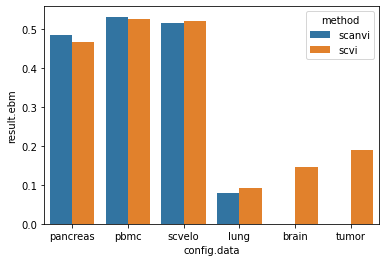

In [29]:
sns.barplot(x='config.data', y='result.ebm', hue='method', data=results)

<AxesSubplot:xlabel='config.data', ylabel='result.knn'>

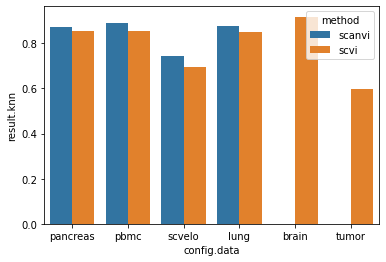

In [30]:
sns.barplot(x='config.data', y='result.knn', hue='method', data=results)

<AxesSubplot:xlabel='config.data', ylabel='result.graph_conn'>

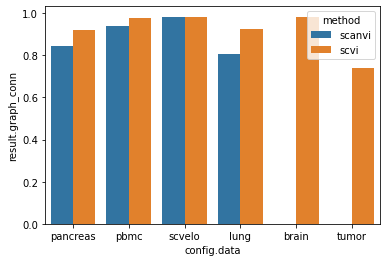

In [31]:
sns.barplot(x='config.data', y='result.graph_conn', hue='method', data=results)

<AxesSubplot:xlabel='config.data', ylabel='result.PCR_batch'>

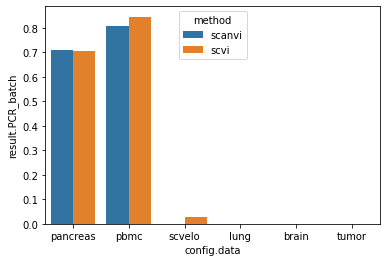

In [32]:
sns.barplot(x='config.data', y='result.PCR_batch', hue='method', data=results)